## Decision Trees

http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree

#### Decision trees:

- consequently check simple conditions
- easy to interpret
- close to how people make decisions
- work well with non-linear dependencies
- very susceptible to overfitting (can be fitted up to 1 object in 1 leaf)



#### Overfitting treatment:

- limit the number of objects in the node
- limit the depth of the tree
- pruning (delete the leafs unless improving test accuracy)

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import  datasets, metrics, tree
from sklearn.model_selection import train_test_split

import numpy as np

In [2]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Data generation

In [3]:
classification_problem = datasets.make_classification(n_features = 2, n_informative=2,
                                                      n_classes = 3, n_redundant=0,
                                                      n_clusters_per_class=1, random_state=3)

In [4]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

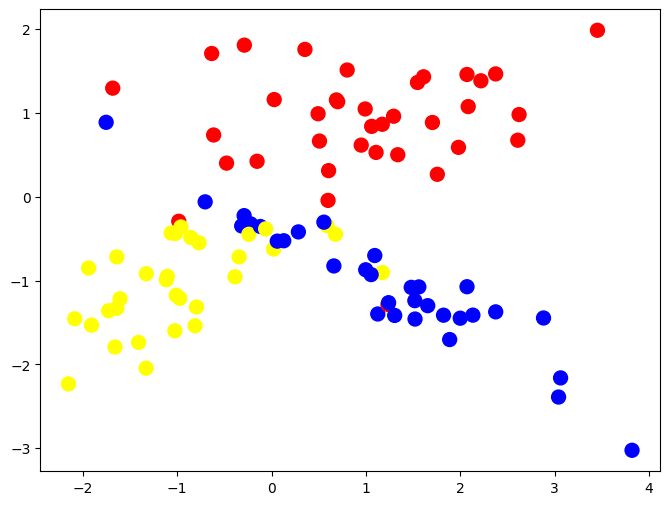

In [5]:
pylab.figure(figsize=(8,6))
pylab.scatter(list(map(lambda x: x[0], classification_problem[0])),list(map(lambda x: x[1], classification_problem[0])),
              c=classification_problem[1], cmap=colors, s=100)

In [6]:
train_data, test_data, train_labels, test_labels = train_test_split(classification_problem[0],
                                                                    classification_problem[1],
                                                                    test_size=0.3,
                                                                    random_state=1)

In [7]:
len(classification_problem[1])

100

### Model DecisionTreeClassifier

In [8]:
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(train_data, train_labels)

DecisionTreeClassifier(random_state=1)

In [9]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.7666666666666667

In [10]:
predictions

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 0,
       2, 0, 0, 0, 2, 1, 2, 0])

### Decision surface

In [11]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [12]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels,
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)

    #set figure size
    pyplot.figure(figsize = (16, 6))

    #plot decision surface on the train data
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))

    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

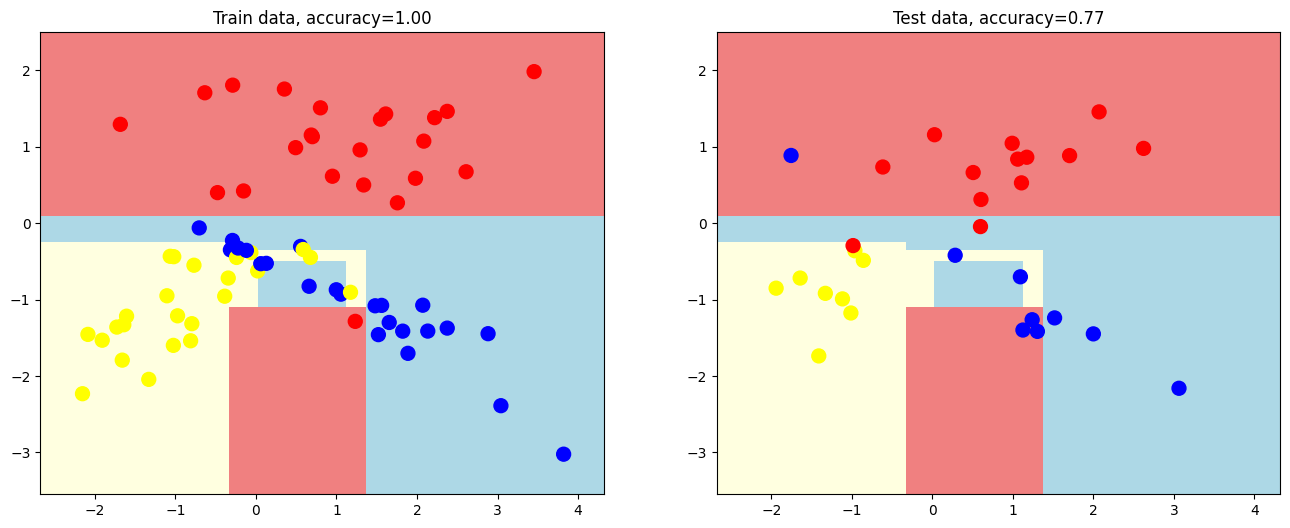

In [13]:
estimator = tree.DecisionTreeClassifier(random_state = 1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

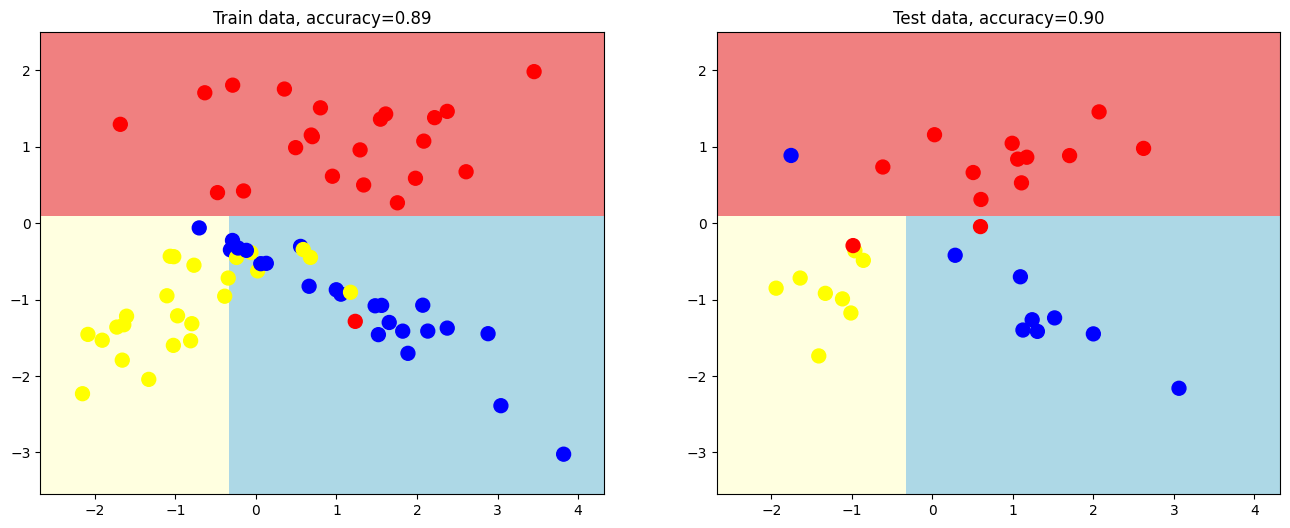

In [14]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1, max_depth = 2),
                      train_data, train_labels, test_data, test_labels)

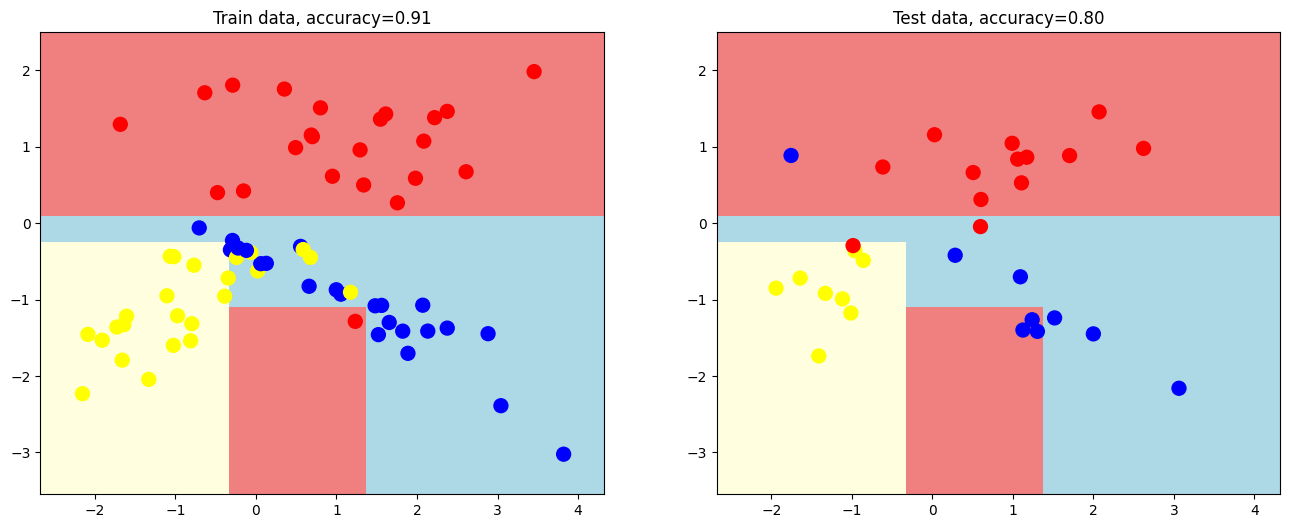

In [15]:
# Overfitting!
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1, max_depth = 5),
                      train_data, train_labels, test_data, test_labels)

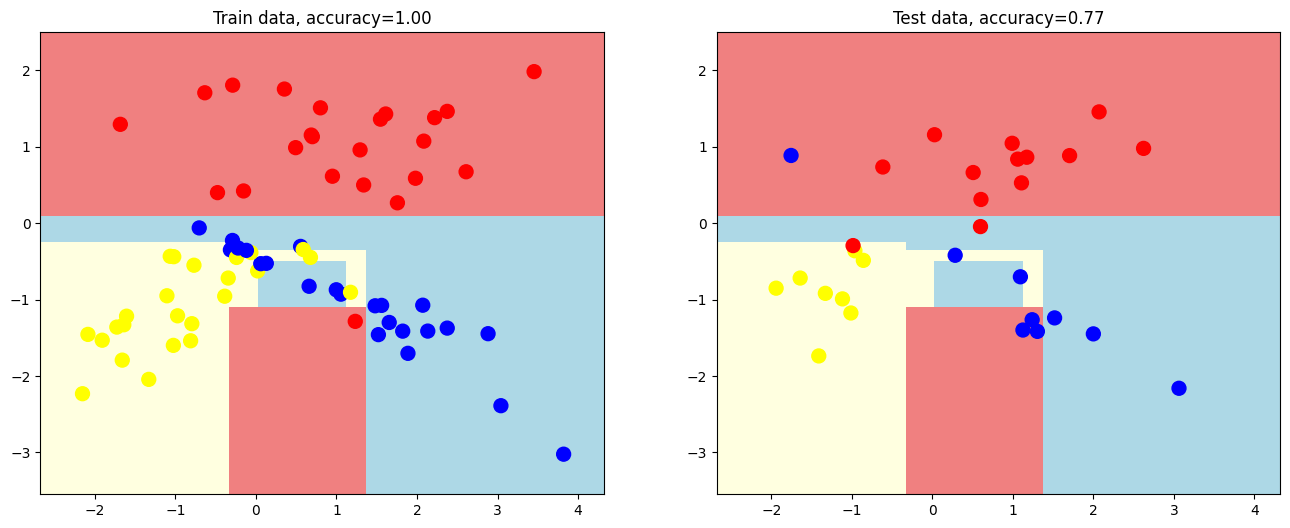

In [16]:
# default
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1),
                      train_data, train_labels, test_data, test_labels)

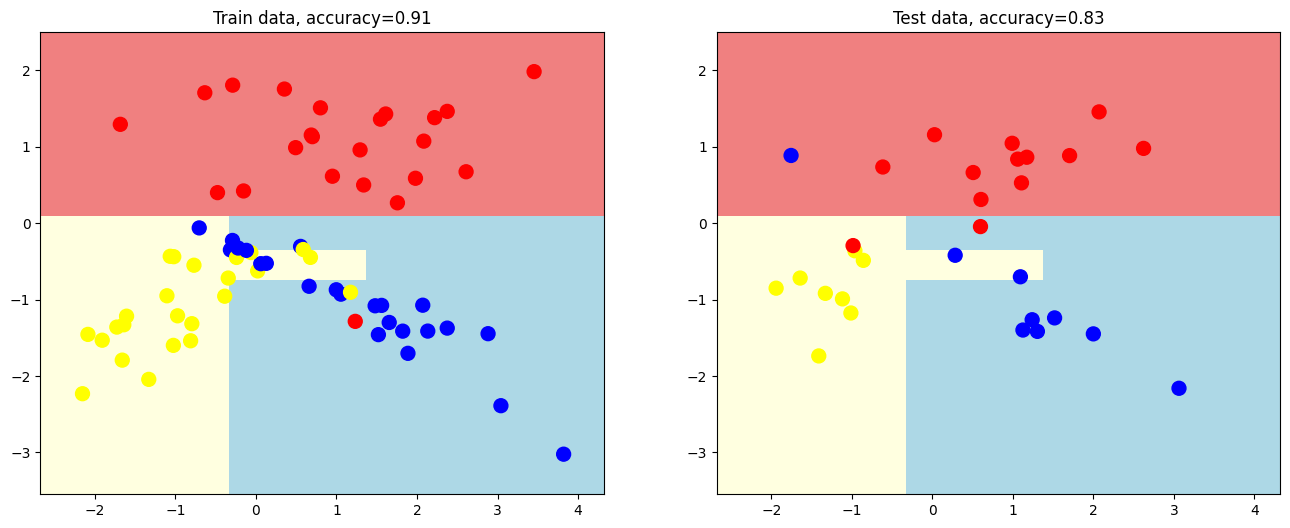

In [17]:
estimator = tree.DecisionTreeClassifier(random_state = 1,  min_samples_leaf=5)
plot_decision_surface(estimator,
                      train_data, train_labels, test_data, test_labels)

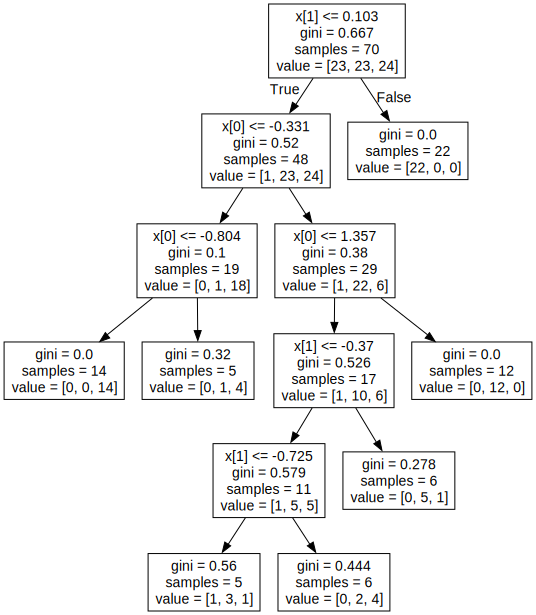

In [18]:
from graphviz import Source
from IPython.display import SVG

graph = Source(tree.export_graphviz(estimator, out_file=None))
SVG(graph.pipe(format='svg'))